# Week 2 Lab: Data Preprocessing and Exploratory Data Analysis
# CDS 403 Machine Learning - Spring 2025

Lab Objectives:
1. Learn to load and inspect datasets using pandas
2. Perform basic data cleaning and preprocessing
3. Conduct exploratory data analysis
4. Create meaningful visualizations
5. Practice feature engineering

Dataset: We'll use the California Housing dataset from scikit-learn
Note on units:
- PRICE: in 100,000s of dollars
- MedInc: in tens of thousands of dollars
- Population: in thousands
- Latitude and Longitude: in degrees


Step 1: Initial Data Inspection
--------------------------------------------------

Dataset Description:
MedInc: Median income in tens of thousands ($)
HouseAge: Median house age in years
AveRooms: Average number of rooms per household
AveBedrms: Average number of bedrooms per household
Population: Block population in thousands
AveOccup: Average occupancy per household
Latitude: Block latitude in degrees
Longitude: Block longitude in degrees
PRICE: Median house value in hundreds of thousands ($)

First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitu

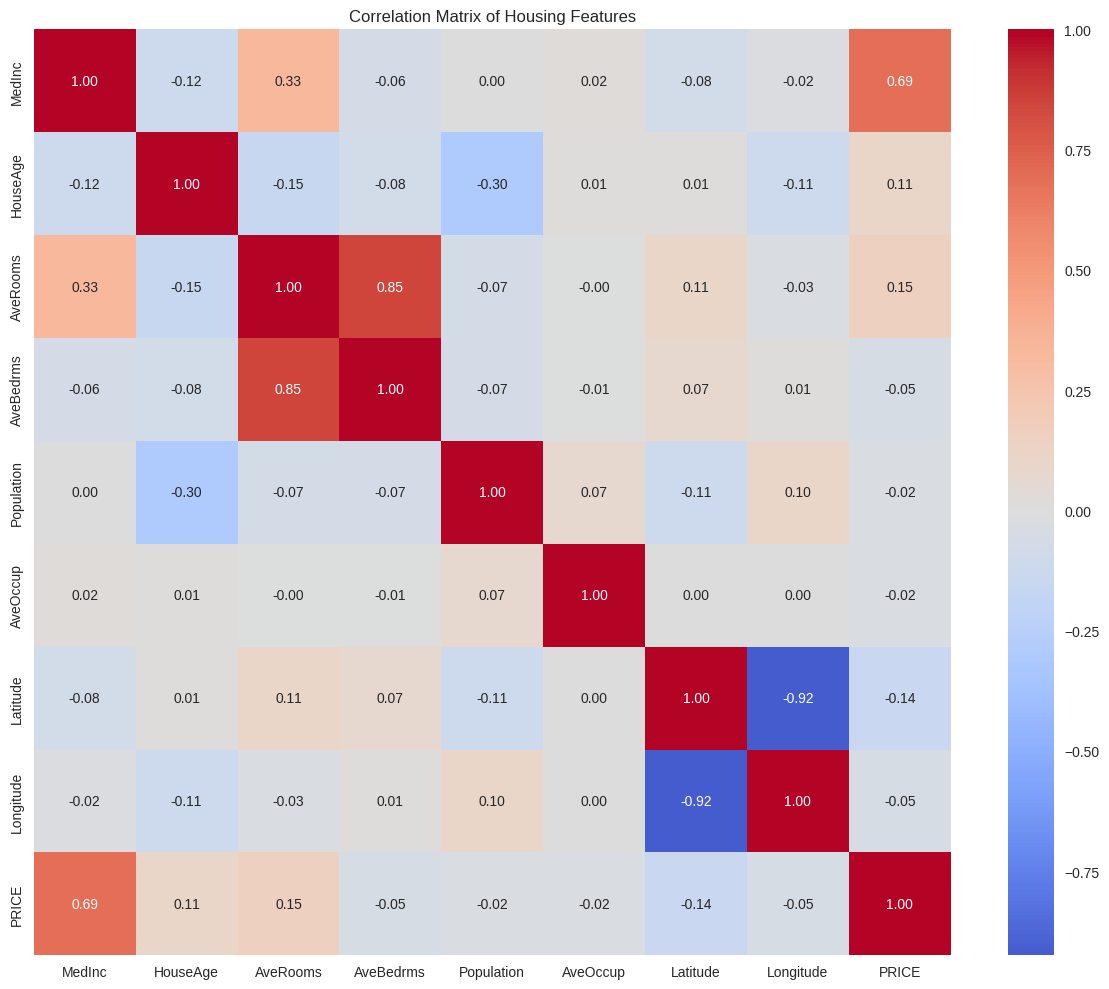

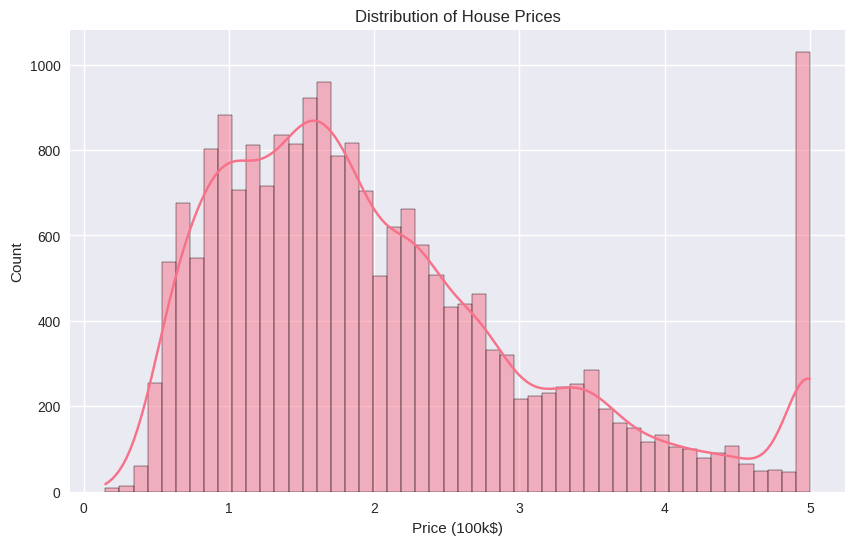

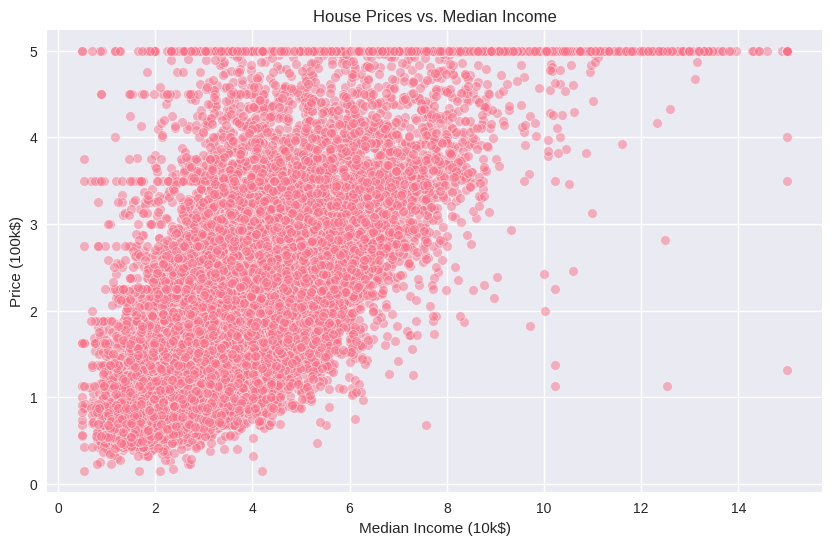

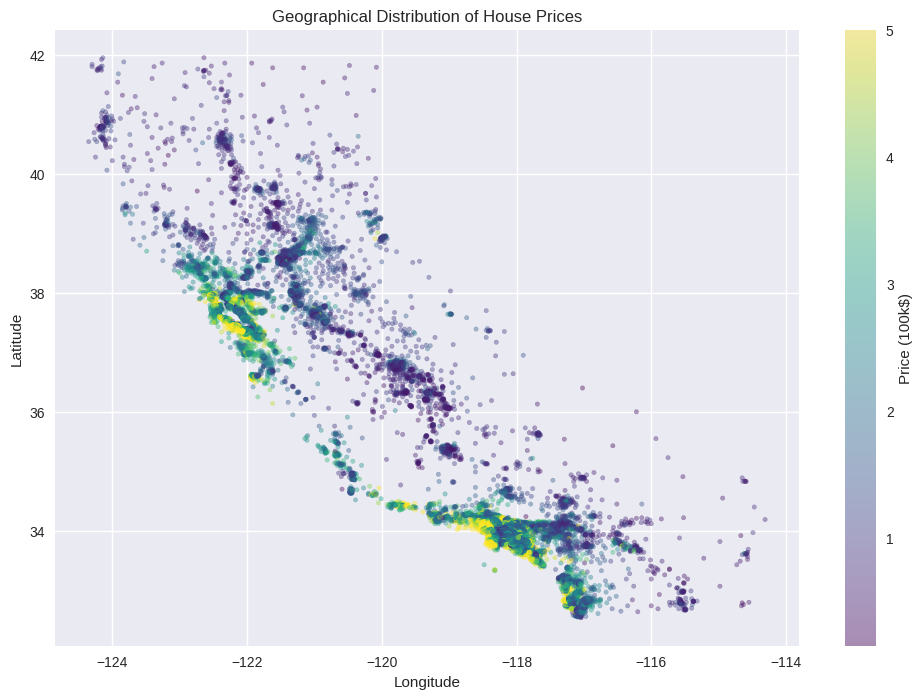


Step 4: Feature Engineering
--------------------------------------------------

New features added:
   PRICE_PER_ROOM  INCOME_PER_PERSON  POPULATION_DENSITY AGE_CATEGORY
0        0.648041          25.854658           18.040909     Very Old
1        0.574691           3.457476          182.426257       Medium
2        0.424824          14.631855           21.355828     Very Old
3        0.586693          10.113082           37.645997     Very Old
4        0.544744           6.807434           41.229871     Very Old

Step 5: Data Preprocessing
--------------------------------------------------

Outlier detection example for PRICE:
Number of outliers detected: 1071
Percentage of outliers: 5.19%

Training set shape: (16512, 11)
Test set shape: (4128, 11)

Scaled feature statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04   
mean  -6.519333e-17 -9.251859e-18 -1.981081e-16 -1.7

In [2]:
# Part 1: Setup and Data Loading
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]  # Set default figure size

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Add column descriptions
column_descriptions = {
    'MedInc': 'Median income in tens of thousands ($)',
    'HouseAge': 'Median house age in years',
    'AveRooms': 'Average number of rooms per household',
    'AveBedrms': 'Average number of bedrooms per household',
    'Population': 'Block population in thousands',
    'AveOccup': 'Average occupancy per household',
    'Latitude': 'Block latitude in degrees',
    'Longitude': 'Block longitude in degrees',
    'PRICE': 'Median house value in hundreds of thousands ($)'
}

print("Step 1: Initial Data Inspection")
print("-" * 50)
print("\nDataset Description:")
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")

print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumn information:")
print(df.info())

# Part 2: Basic Data Cleaning
# --------------------------
print("\nStep 2: Data Cleaning")
print("-" * 50)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Basic statistics of the dataset
print("\nBasic statistics of numerical columns:")
print(df.describe())

# Part 3: Exploratory Data Analysis
# -------------------------------
print("\nStep 3: Exploratory Data Analysis")
print("-" * 50)

# Create a correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.show()

# Distribution of house prices
plt.figure()
sns.histplot(data=df, x='PRICE', bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (100k$)')
plt.ylabel('Count')
plt.show()

# Relationship between median income and house prices
plt.figure()
sns.scatterplot(data=df, x='MedInc', y='PRICE', alpha=0.5)
plt.title('House Prices vs. Median Income')
plt.xlabel('Median Income (10k$)')
plt.ylabel('Price (100k$)')
plt.show()

# Geographical distribution of prices
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'],
           c=df['PRICE'], cmap='viridis',
           alpha=0.4, s=10)
plt.colorbar(label='Price (100k$)')
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Part 4: Feature Engineering
# -------------------------
print("\nStep 4: Feature Engineering")
print("-" * 50)

# Create new features
df['PRICE_PER_ROOM'] = df['PRICE'] / df['AveRooms']
df['INCOME_PER_PERSON'] = df['MedInc'] / (df['Population'] / 1000)  # Adjusted for population in thousands
df['POPULATION_DENSITY'] = df['Population'] / (df['AveRooms'] * df['AveOccup'])  # People per room
df['AGE_CATEGORY'] = pd.qcut(df['HouseAge'], q=4, labels=['New', 'Medium', 'Old', 'Very Old'])

print("\nNew features added:")
print(df[['PRICE_PER_ROOM', 'INCOME_PER_PERSON', 'POPULATION_DENSITY', 'AGE_CATEGORY']].head())

# Part 5: Data Preprocessing
# ------------------------
print("\nStep 5: Data Preprocessing")
print("-" * 50)

def detect_outliers(df, column, threshold=1.5):
    """
    Detect outliers in a column using the IQR method.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataset
    column : str
        Column name to check for outliers
    threshold : float
        IQR multiplier for outlier detection

    Returns:
    --------
    pandas.Series
        Boolean series indicating outlier status
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Example of outlier detection
print("\nOutlier detection example for PRICE:")
outliers = detect_outliers(df, 'PRICE')
print(f"Number of outliers detected: {outliers.sum()}")
print(f"Percentage of outliers: {(outliers.sum() / len(df) * 100):.2f}%")

# Separate features and target
X = df.drop(['PRICE', 'AGE_CATEGORY'], axis=1)
y = df['PRICE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled feature statistics:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe())

#Homework 1
Name: Eric Wu

## Exercise 1 (30 points)

Analyze the features created in the lab (PRICE_PER_ROOM and INCOME_PER_PERSON)
Tasks:
1. Create visualizations showing the distribution of both engineered features
2. Analyze their correlation with house prices
3. Create meaningful visualizations showing relationships between these features and
AGE_CATEGORY
4. Write a detailed interpretation of your findings

Hints:

Example visualization code
```python
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_CATEGORY', y='PRICE_PER_ROOM', data=df)
plt.title('Price per Room by Age Category')
plt.xticks(rotation=45)
plt.show()
```

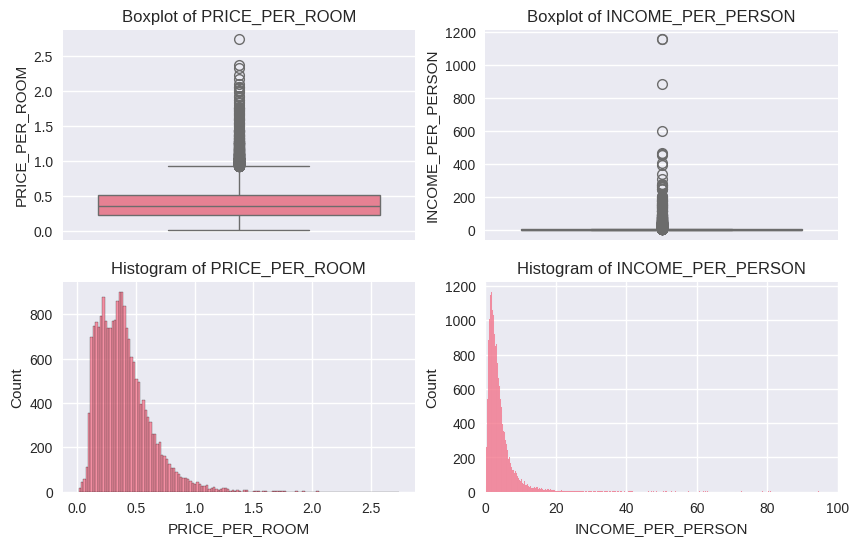

In [2]:
#1 Create visualizations showing the distribution of both engineered features

features_to_plot = ['PRICE_PER_ROOM', 'INCOME_PER_PERSON'] #select features to plot

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,6)) #setup 1x2 boxplots

#plot boxplots
sns.boxplot(y=features_to_plot[0], data=df, ax=ax1)
ax1.set_title(f'Boxplot of {features_to_plot[0]}')
'''ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)'''

sns.boxplot(y=features_to_plot[1], data=df, ax=ax2)
ax2.set_title(f'Boxplot of {features_to_plot[1]}')

#plot histograms
sns.histplot(x=features_to_plot[0], data=df, ax=ax3)
ax3.set_title(f'Histogram of {features_to_plot[0]}')

sns.histplot(x=features_to_plot[1], data=df, ax=ax4)
ax4.set_title(f'Histogram of {features_to_plot[1]}')
ax4.set_xlim(0,100) #zoom in a bit; I know I am loosing some data, especially the outliers of extremely high earners, this is to see where the center without outliers is

plt.show()

>From the histogram of price per room, we can see that the data is right skewed, meaning the average price per room is greater than the median ppr. This tracks because in the discovery phase, we saw price was heavily right skewed. This histogram shows that the median price per room is centered at around ~0.4. I would estamate either there are a lot of very expensive small houses or large houses that are extremely expensive.

>Now with income per person, it is even more right skewed. The histogram shows a center near 7. Which means the median person likely makes ~70k per year. This tracks with the idea that there are very very few high (top 1%) earners generally.

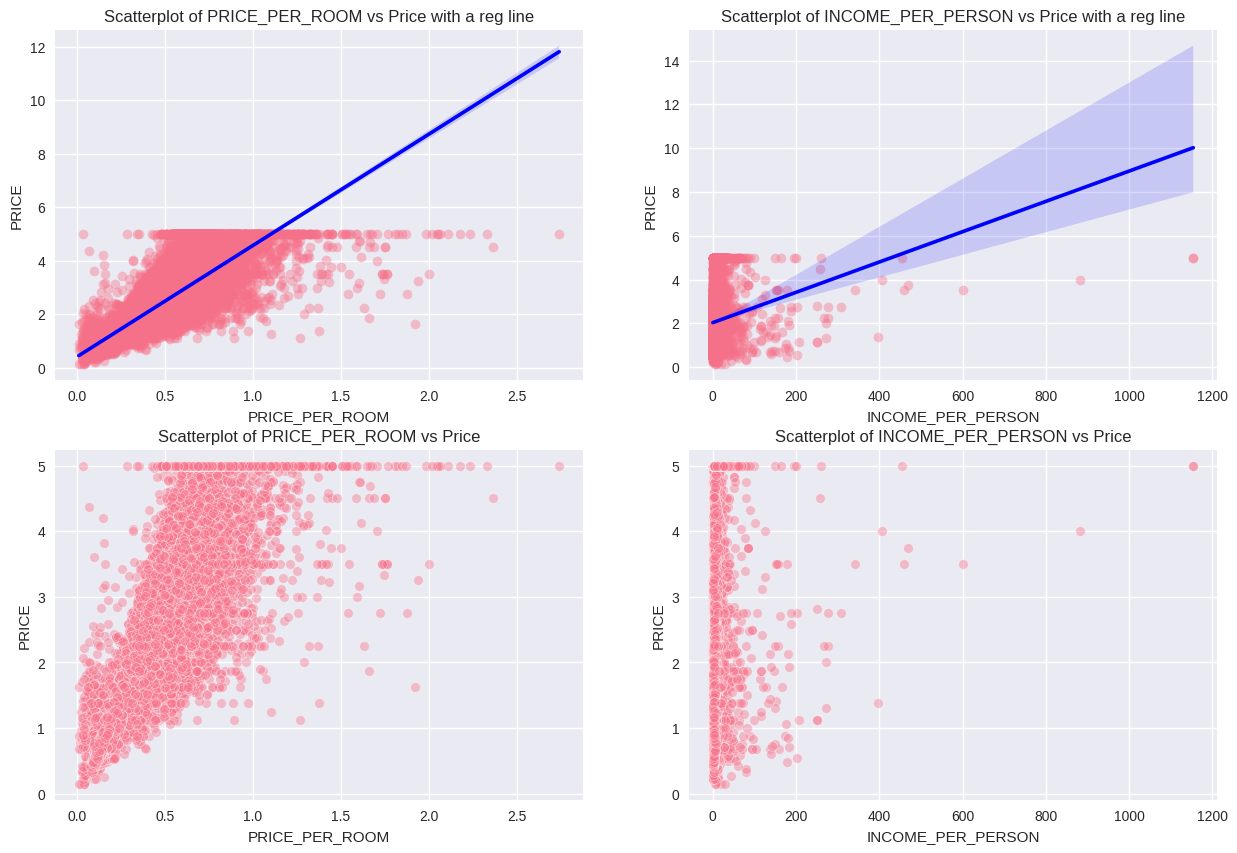

In [3]:
#2 Analyze their correlation with house prices

fig, ax = plt.subplots(2,2, figsize=(15,10)) #setup 2x2 boxplots

#plot regplot; blue reg line and alpha = 0.4
sns.regplot(x=features_to_plot[0], y='PRICE', data=df, ax=ax[0,0], scatter_kws={'alpha': 0.4}, line_kws={'color': 'blue'})
ax[0,0].set_title(f'Scatterplot of {features_to_plot[0]} vs Price with a reg line')

sns.regplot(x=features_to_plot[1], y='PRICE', data=df, ax=ax[0,1], scatter_kws={'alpha': 0.4}, line_kws={'color': 'blue'})
ax[0,1].set_title(f'Scatterplot of {features_to_plot[1]} vs Price with a reg line')

#plot scatterplot; alpha = 0.4
sns.scatterplot(x=features_to_plot[0], y='PRICE', data=df, ax=ax[1,0], alpha = 0.4)
ax[1,0].set_title(f'Scatterplot of {features_to_plot[0]} vs Price')

sns.scatterplot(x=features_to_plot[1], y='PRICE', data=df, ax=ax[1,1], alpha = 0.4)
ax[1,1].set_title(f'Scatterplot of {features_to_plot[1]} vs Price')

plt.show()

>From theses features, we can see a very positive linear relationship between ppr and price, which makes sense as ppr is derived from price/avg rooms. As ppr rises, so does the price of a house. This is logical, as rooms are more expensive, so should a house rise in cost.

>Interestingly, there does not seem to be a substantial linear relationship between income per person and the price of a house. It could be that some people live far below their means and others live above their means. This could also be due to ipp making too many assumptions when generating the feature.

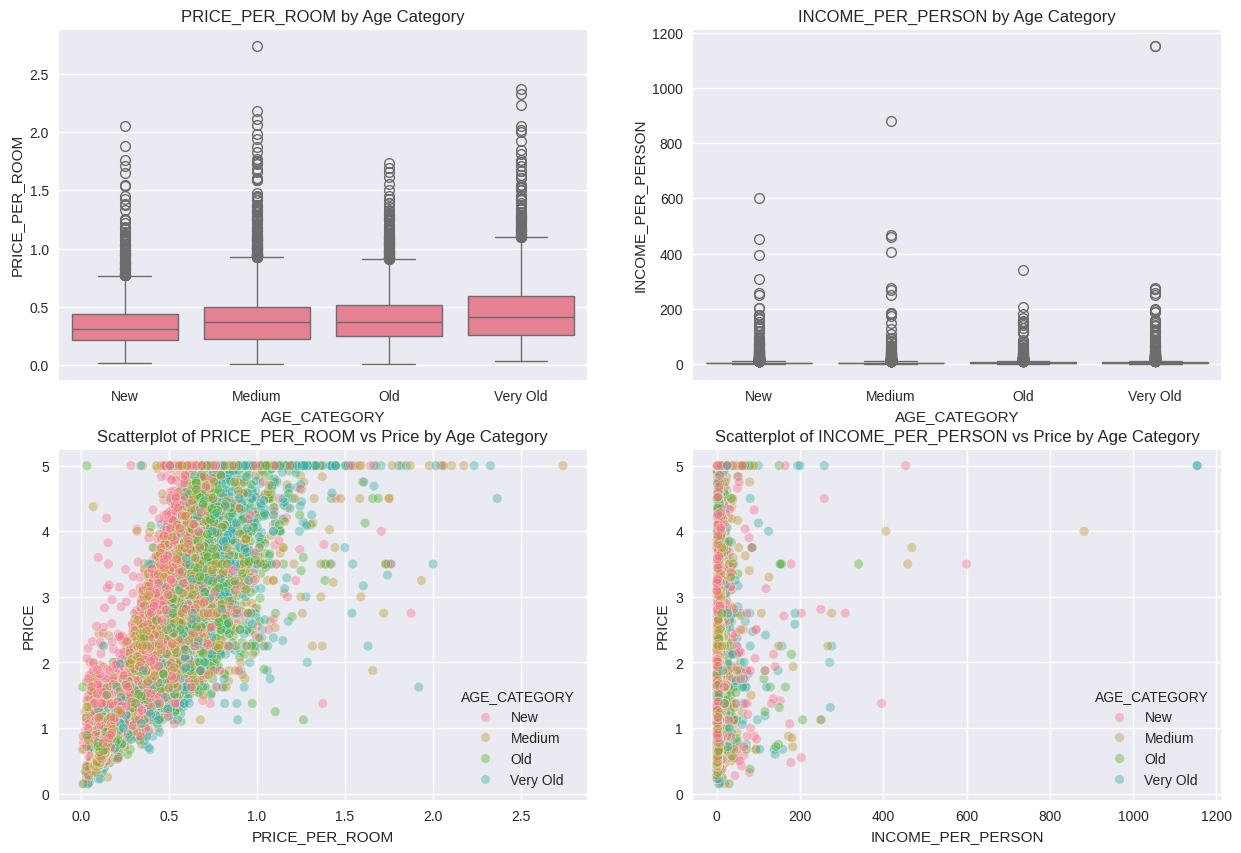

In [4]:
#3 Create meaningful visualizations showing relationships between these features and AGE_CATEGORY

fig, ax = plt.subplots(2,2, figsize=(15,10)) #setup boxplots

#plot boxplots comparing features to plot and age cat
sns.boxplot(x='AGE_CATEGORY',y=features_to_plot[0], data=df, ax=ax[0,0])
ax[0,0].set_title(f'{features_to_plot[0]} by Age Category')

sns.boxplot(x='AGE_CATEGORY', y=features_to_plot[1], data=df, ax=ax[0,1])
ax[0,1].set_title(f'{features_to_plot[1]} by Age Category')

#plot scaterplots comparing features to plot and price with hue=age cat
sns.scatterplot(x=features_to_plot[0], y='PRICE', data=df, hue='AGE_CATEGORY', alpha = 0.4, ax=ax[1,0], legend=True)
ax[1,0].set_title(f'Scatterplot of {features_to_plot[0]} vs Price by Age Category')

sns.scatterplot(x=features_to_plot[1], y='PRICE', data=df, hue='AGE_CATEGORY', alpha = 0.4, ax=ax[1,1], legend=True)
ax[1,1].set_title(f'Scatterplot of {features_to_plot[1]} vs Price by Age Category')

plt.show()

####Write a detailed interpretation of your findings
>It seems the age category of a house affects the price per room. Which could also mean the age category of a house inpacts the price of a house, ie older houses are more expensive.

>It also seems like older houses are more expensive on a price per room basis as shown in the scattterplot. But there are old and new houses at the top and bottom of price so this may just be a more general notion and not a hard rule.

>In the comparison between age category of a house and income per person, there are many outliers at the tops of the income per person for each age category. This may be due to really rich people not caring about how old a house is, and choosing a house for a different reason.

>The prior notion may be supported by the lack of linearity shown in the scatterplot of ipp and price by age category/

##Exercise 2 (30 points)
Create and analyze population density patterns.
Tasks:
1. Calculate population density using the Population column
2. Create a new feature for population density zones (Low, Medium, High) using pd.qcut()
3. Analyze how house prices vary across different population density zones
4. Compare population density patterns across different age categories

Hints:
```python
# Calculate population density
df['Population_Density'] = df['Population'] / df['AveOccup']
# Create density categories
df['Density_Zone'] = pd.qcut(df['Population_Density'],
q=3,
labels=['Low', 'Medium', 'High'])
```

In [73]:
#1 Calculate population density using the Population column

#df.head() #population density exists

In [74]:
#2 Create density categories

df['Density_Zone'] = pd.qcut(df['POPULATION_DENSITY'], q=3, labels=['Low', 'Medium', 'High'])

#sanity check
print(df['Density_Zone'].value_counts())

'''sns.countplot(x='Density_Zone', data=df)
plt.title('Count Plot of Density_Zone')
plt.show()''' #checks out since quantiles = 3 and since 20640 (number of rows) is divisible by 3, all three counts should be equal

Density_Zone
Low       6880
Medium    6880
High      6880
Name: count, dtype: int64


"sns.countplot(x='Density_Zone', data=df)\nplt.title('Count Plot of Density_Zone')\nplt.show()"

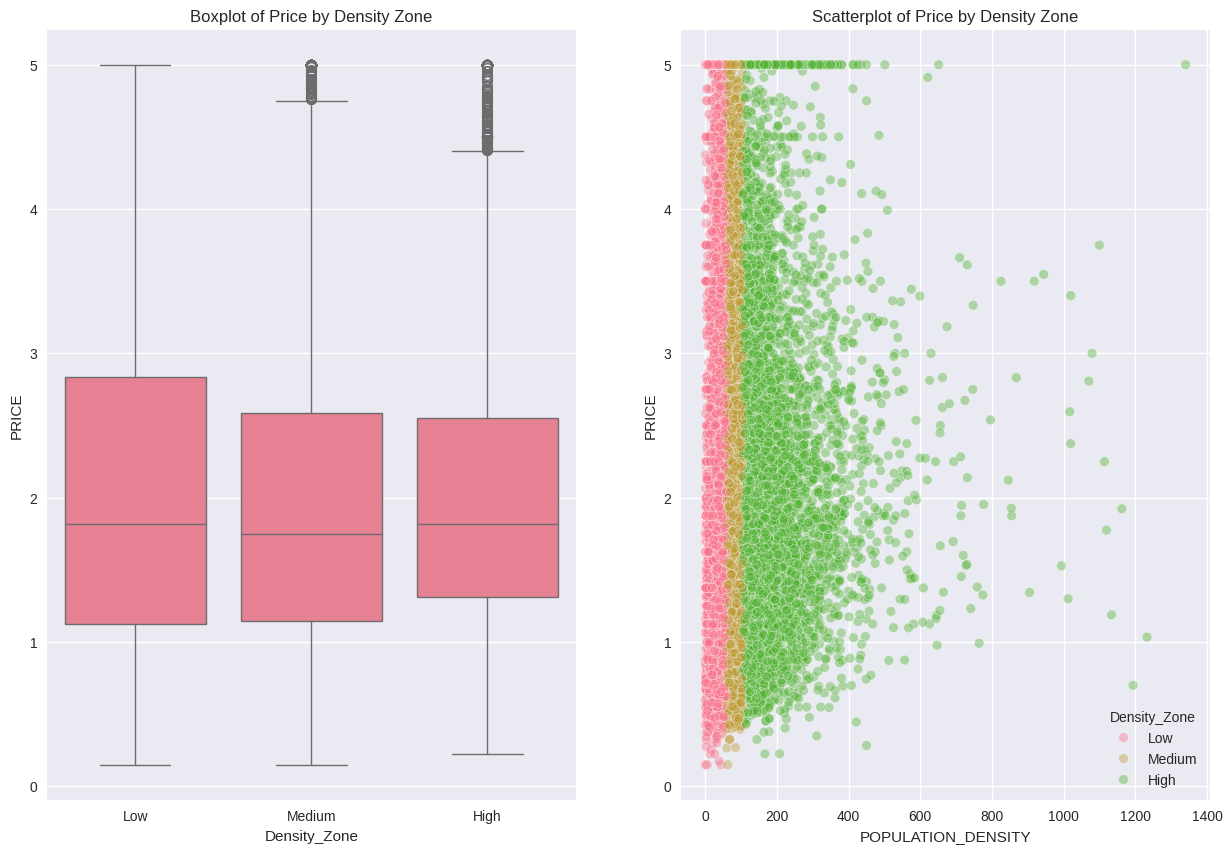

In [7]:
#3 Analyze how house prices vary across different population density zones

fig, ax = plt.subplots(1,2, figsize=(15,10)) #setup 2x2 boxplots

#plot boxplots
sns.boxplot(x='Density_Zone', y='PRICE', data=df, ax=ax[0])
ax[0].set_title('Boxplot of Price by Density Zone')

#plot scatterplot
sns.scatterplot(x='POPULATION_DENSITY', y='PRICE', data=df, ax=ax[1], alpha=0.4, hue='Density_Zone')
ax[1].set_title('Scatterplot of Price by Density Zone')

plt.show()

>From the boxplot, it seems like the 3rd quartile becomes tighter for price as density zones increase. This is somewhat counter iintuitive, as one would assume highly dense areas like LA would have high prices, but this may be explained by people choosing less expensive housing in highly dense zones or high priced housing is less common in those zones. ie $25 million dollar mansions in calabassas vs condo pricing in LA

>From the scatterplot we can observe that houses in low density zones span the whole price spectrum, but as population density increases, the entry point of house prices rise. Which makes sense.


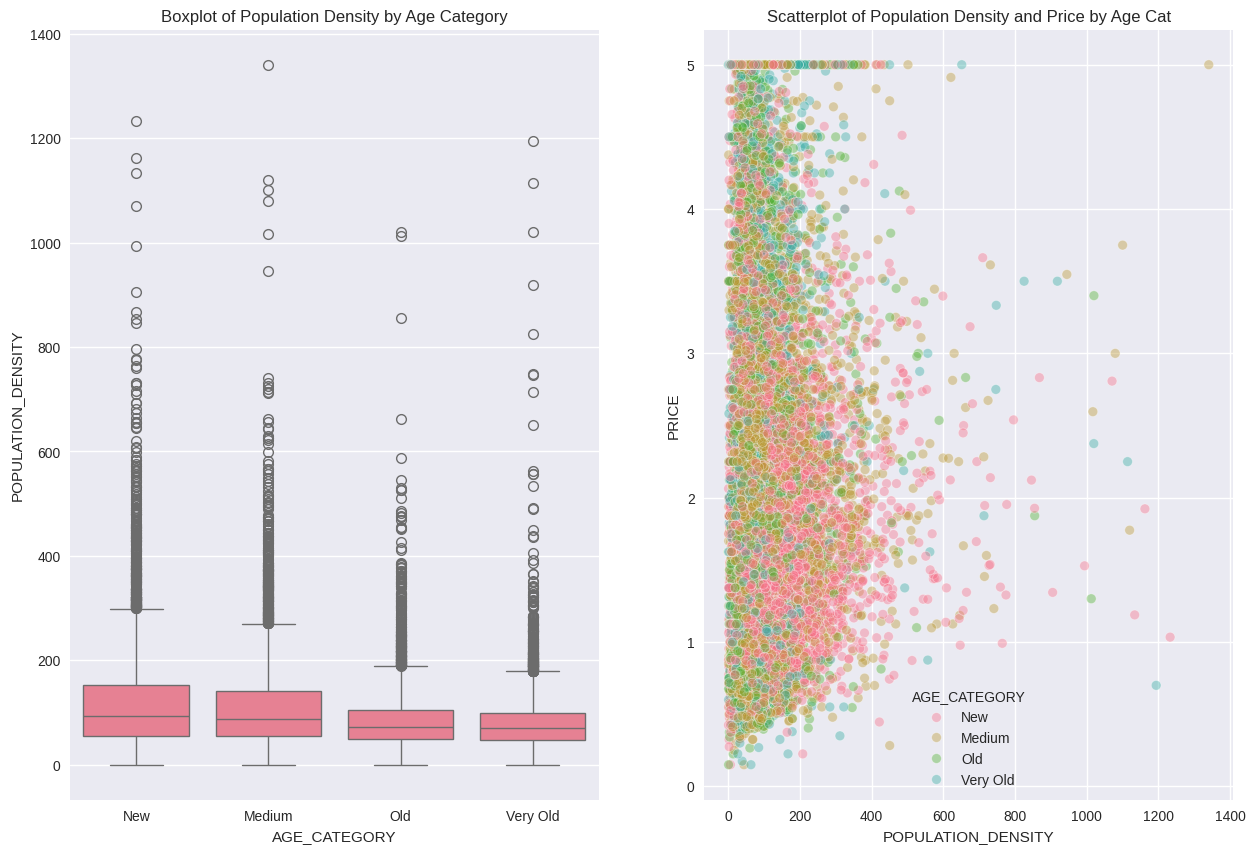

In [8]:
#4 Compare population density patterns across different age categories

fig, ax = plt.subplots(1,2, figsize=(15,10)) #setup 2x2 boxplots

#plot boxplots
sns.boxplot(x='AGE_CATEGORY', y='POPULATION_DENSITY', data=df, ax=ax[0])
ax[0].set_title('Boxplot of Population Density by Age Category')

sns.scatterplot(x='POPULATION_DENSITY', y='PRICE', data=df, ax=ax[1], hue='AGE_CATEGORY', alpha = 0.4)
ax[1].set_title('Scatterplot of Population Density and Price by Age Cat')

plt.show()

>From this boxplot we can see newer houses tended to be in areas that are more dense.

>From the scatterplot, we can see that very old and old houses tended to be higher in the price spectrum, with newer houses being more at the lower end of price. And building on the boxplot, we can see that newer houses tended to be built in denser areas with older houses being in less dense locations.

##Exercise 3 (30 points)
Create comprehensive feature relationship visualizations.
Tasks:
1. Select 4 key features (including at least one engineered feature)
2. Create a pair plot showing relationships between selected features
3. Add appropriate color coding using either AGE_CATEGORY or Density_Zone
4. Provide detailed interpretations of the relationships observed

Hints:
```python
selected_features = ['PRICE', 'PRICE_PER_ROOM', 'INCOME_PER_PERSON', 'Population_Density']
sns.pairplot(df[selected_features + ['AGE_CATEGORY']],
hue='AGE_CATEGORY',
plot_kws={'alpha': 0.6})
```

In [9]:
#1 Select 4 key features (including at least one engineered feature)

#check dtype
print(df.info())

#find correlations for numerical values
num_correlation_matrix = df.select_dtypes(include='number').corr()

print(abs(num_correlation_matrix.loc['PRICE']).sort_values(ascending=False)) #find and sort numerical values absolute r value

#find statistical significance between categorical features and PRICE
cat_features = df.select_dtypes(include='category')

print(cat_features.columns)

#use Kruskal-Wallis Test, since anova normality assumption is not met
from scipy.stats import kruskal

for cat in cat_features:
  groups = [df['PRICE'][df[cat] == category] for category in df[cat].unique()]
  kruskal_result = kruskal(*groups)
  print(f'kruskal_result for {cat}: {kruskal_result}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MedInc              20640 non-null  float64 
 1   HouseAge            20640 non-null  float64 
 2   AveRooms            20640 non-null  float64 
 3   AveBedrms           20640 non-null  float64 
 4   Population          20640 non-null  float64 
 5   AveOccup            20640 non-null  float64 
 6   Latitude            20640 non-null  float64 
 7   Longitude           20640 non-null  float64 
 8   PRICE               20640 non-null  float64 
 9   PRICE_PER_ROOM      20640 non-null  float64 
 10  INCOME_PER_PERSON   20640 non-null  float64 
 11  POPULATION_DENSITY  20640 non-null  float64 
 12  AGE_CATEGORY        20640 non-null  category
 13  Density_Zone        20640 non-null  category
dtypes: category(2), float64(12)
memory usage: 1.9 MB
None
PRICE                 1.000000
P

In [10]:
selected_features = ['PRICE', 'PRICE_PER_ROOM', 'MedInc', 'AveRooms'] #I selected the most significantly correlated features from the correlation matrix

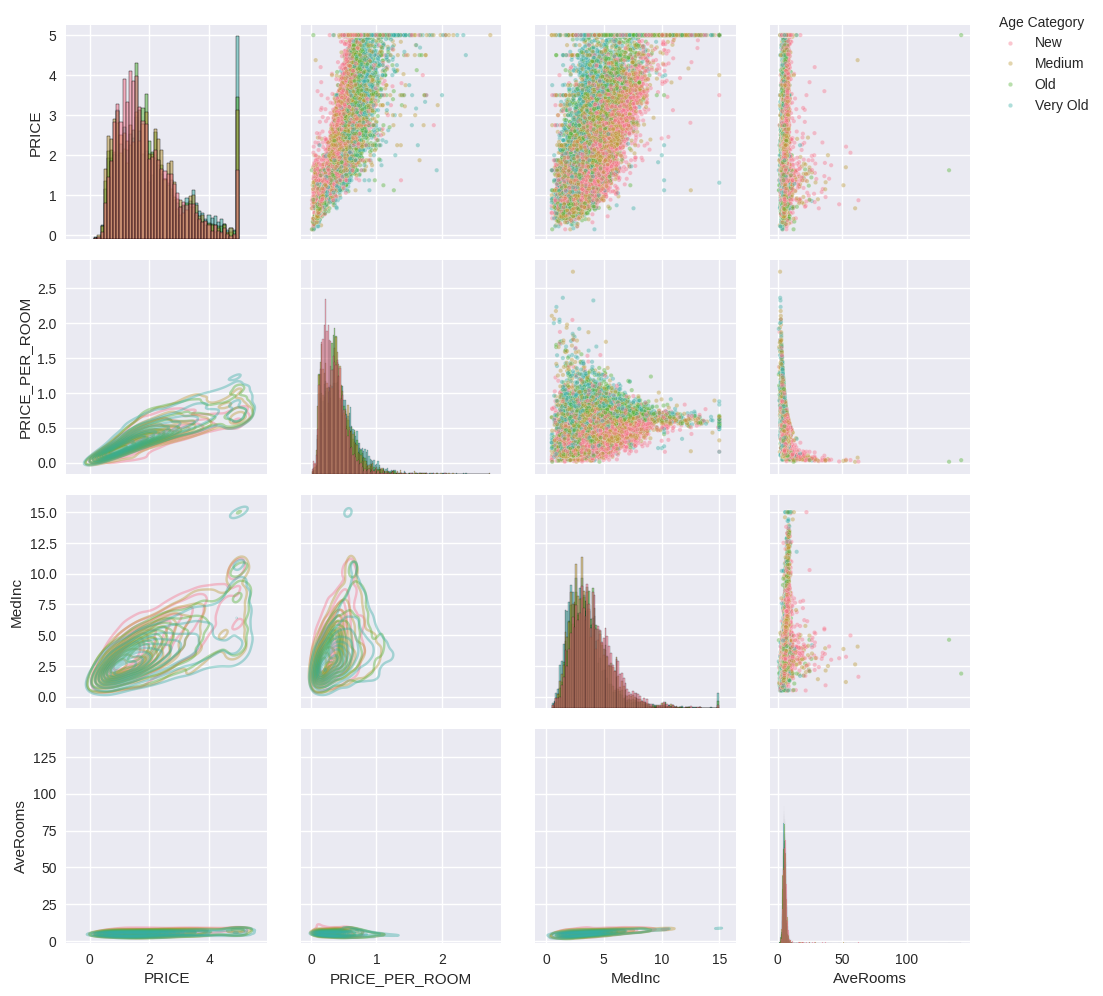

In [11]:
#2 Create a pair plot showing relationships between selected features

#get data
dtta = df[selected_features + ['AGE_CATEGORY']]

#plot
g = sns.PairGrid(data=dtta, hue='AGE_CATEGORY')
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot, alpha=0.4, s=10, data=dtta, legend=True) #scatterplot above diagonal; adj alpha
g.map_lower(sns.kdeplot, alpha=0.4, data=dtta, legend=True) #reg plot below diagonal; change size and alpha

#add legend
ax = g.axes[0, 1]
handles, labels = ax.get_legend_handles_labels()  # Assuming 'ax' is an axes object from g
g.fig.legend(handles, labels, title="Age Category", loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

#### 4 Provide detailed interpretations of the relationships observed
>Off the bat, looking at the histograms, all of the features are right skewed, with average rooms being heavily skewed. This is probably explained by some mansions having upwards of 50 + rooms.

>From the scatterplots, we can see that price per room and medinc have a strong positive correlation with price. This makes sense as the more expensive a houses the more expensive a room would be and the more money a person would have to make to buy the house. AveRooms and price however did not exhibit this same positive linear relatinoship. I would assumne this is due to AveRooms having too many outliers on the highend.

>There are some interesting interactions between features. Between price per room and median income, it seems older houses were again more expensive generally, as we get to high earners, the age category matters less as price per room for super high earners tended to level off at around 0.5. Another interaction was between price per room and average room. The scatterplot looks to be about logarithmic. As the avg rooms grew, the price per room tended to drop. This could be due to mansions.

>Looking at the kdeplots, it seems as price grew, price per room and medinc grew, with age category matering for price per room (older being more expensive), but for medinc, house age tended to matter less. Interestingly, as price increased, the averooms did not grow substantially, probably due to some rich folk choosing houses that did not have that many rooms.

#Additional Challenges (20 bonus points)

##Challenge 1 (10 points)
Create a geographical visualization of house prices
• Use Latitude and Longitude to create a scatter plot
• Color-code points by price
• Add appropriate legends and labels
• Consider adding population density information

<Figure size 2500x1500 with 0 Axes>

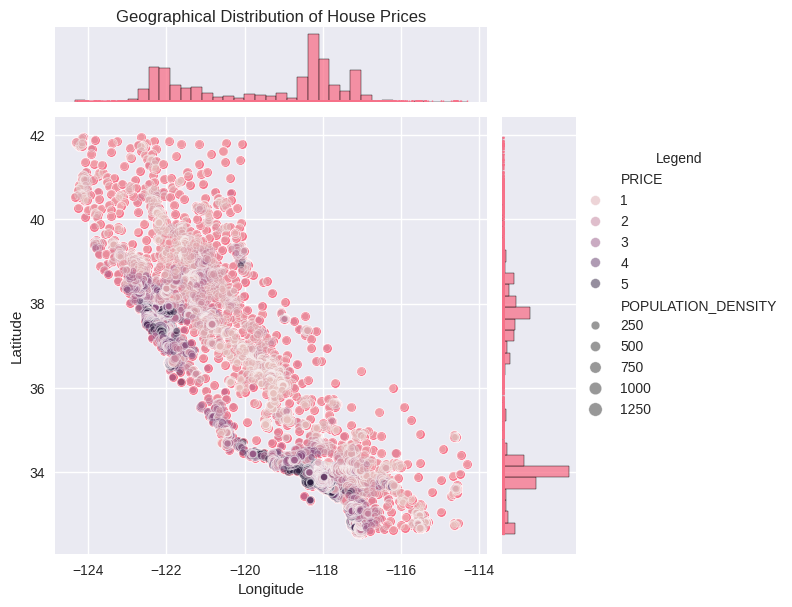

In [12]:
#plot house prices • Use Latitude and Longitude to create a scatter plot

plt.figure(figsize=(25, 15))
g = sns.jointplot(data=df, x='Longitude', y='Latitude',)
g.plot_joint(sns.scatterplot, alpha=0.5, hue='PRICE', size='POPULATION_DENSITY', data=df, legend=True)
g.plot_marginals(sns.rugplot,clip_on=True)

legend = g.ax_joint.legend(title="Legend", bbox_to_anchor=(1.7,.95))

plt.title('Geographical Distribution of House Prices', y=1.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 2500x1500 with 0 Axes>

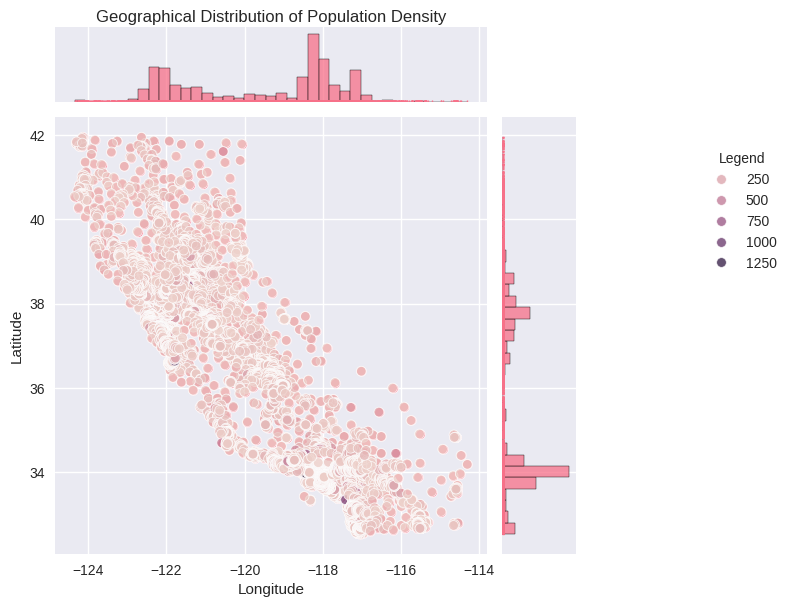

In [13]:
#plot population density
plt.figure(figsize=(25, 15))
g = sns.jointplot(data=df, x='Longitude', y='Latitude',)
g.plot_joint(sns.scatterplot, alpha=0.8, hue='POPULATION_DENSITY', data=df, legend=True)
g.plot_marginals(sns.rugplot,clip_on=True)

legend = g.ax_joint.legend(title="Legend", bbox_to_anchor=(1.7,.95))

plt.title('Geographical Distribution of Population Density', y=1.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##Challenge 2 (10 points)
Analyze regional patterns in the housing market:
• Group data by geographical areas (using Latitude/Longitude bins)
• Compare price trends across regions
• Analyze how income and population density vary by region
• Create visualizations to support your findings

In [14]:
#bin regions by longitude and latitude

#create bin labels
lon_min, lon_max = df['Longitude'].min(), df['Longitude'].max()
lat_min, lat_max = df['Latitude'].min(), df['Latitude'].max()

n = 20

lon_label = [(lon_min + i * (lon_max - lon_min) / n) for i in range(n+1)]
lat_label = [(lat_min + i * (lat_max - lat_min) / n) for i in range(n+1)]

for i in range(n):
  lon_label[i] = str(round(lon_label[i],2))+' - '+str(round(lon_label[i+1],2))
  lat_label[i] = str(round(lat_label[i],2))+' - '+str(round(lat_label[i+1],2))
  if i == n-1:
    lon_label.remove(lon_label[i+1])
    lat_label.remove(lat_label[i+1])

print(lon_label)
print(lat_label)

df['Longitude_Bin'] = pd.cut(df['Longitude'], bins=n, labels=lon_label)
df['Latitude_Bin'] = pd.cut(df['Latitude'], bins=n, labels=lat_label)

['-124.35 - -123.85', '-123.85 - -123.35', '-123.35 - -122.84', '-122.84 - -122.34', '-122.34 - -121.84', '-121.84 - -121.34', '-121.34 - -120.84', '-120.84 - -120.33', '-120.33 - -119.83', '-119.83 - -119.33', '-119.33 - -118.83', '-118.83 - -118.33', '-118.33 - -117.82', '-117.82 - -117.32', '-117.32 - -116.82', '-116.82 - -116.32', '-116.32 - -115.82', '-115.82 - -115.31', '-115.31 - -114.81', '-114.81 - -114.31']
['32.54 - 33.01', '33.01 - 33.48', '33.48 - 33.95', '33.95 - 34.42', '34.42 - 34.89', '34.89 - 35.36', '35.36 - 35.83', '35.83 - 36.3', '36.3 - 36.77', '36.77 - 37.25', '37.25 - 37.72', '37.72 - 38.19', '38.19 - 38.66', '38.66 - 39.13', '39.13 - 39.6', '39.6 - 40.07', '40.07 - 40.54', '40.54 - 41.01', '41.01 - 41.48', '41.48 - 41.95']


<ipython-input-36-b1c10a8d6447>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
<ipython-input-36-b1c10a8d6447>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
<ipython-input-36-b1c10a8d6447>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
<ipython-input-36-b1c10a8d6447>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)


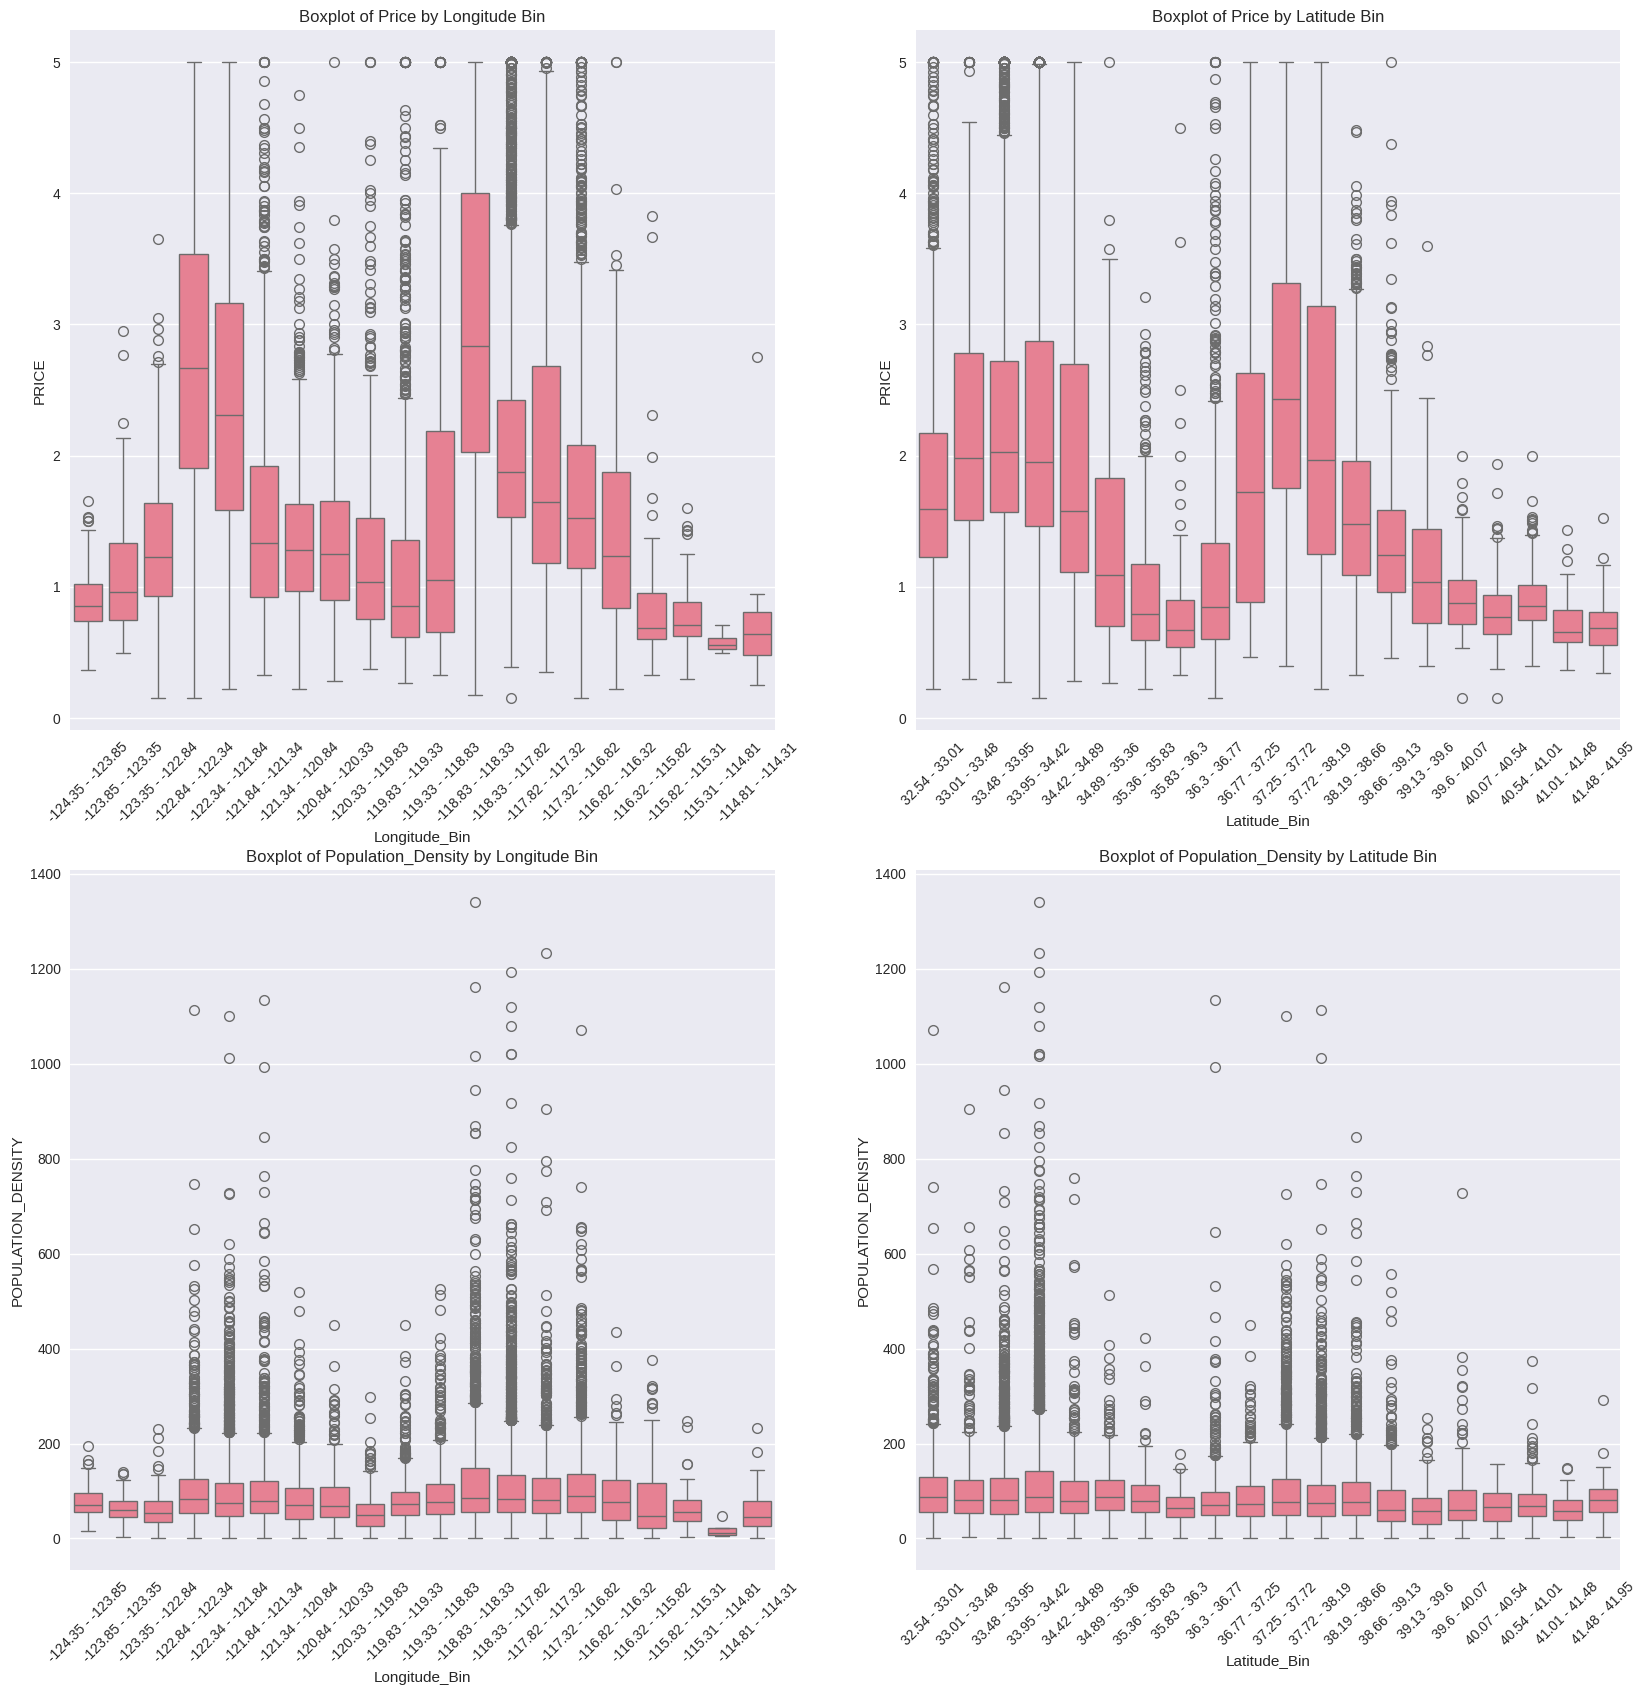

In [36]:
#compare price trends across regions

fig, ax = plt.subplots(2,2,figsize=(20,20))
sns.boxplot(x='Longitude_Bin', y='PRICE', data=df, ax=ax[0,0])
ax[0,0].set_title('Boxplot of Price by Longitude Bin')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)

sns.boxplot(x='Latitude_Bin', y='PRICE', data=df, ax=ax[0,1])
ax[0,1].set_title('Boxplot of Price by Latitude Bin')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)

sns.boxplot(x='Longitude_Bin', y='POPULATION_DENSITY', data=df, ax=ax[1,0])
ax[1,0].set_title('Boxplot of Population_Density by Longitude Bin')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)

sns.boxplot(x='Latitude_Bin', y='POPULATION_DENSITY', data=df, ax=ax[1,1])
ax[1,1].set_title('Boxplot of Population_Density by Latitude Bin')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)

plt.show()

In [58]:
'''all_combinations = pd.MultiIndex.from_product([df['Longitude_Bin'].unique(), df['Latitude_Bin'].unique()], names=['Longitude_Bin', 'Latitude_Bin'])

average_price_popD_with_missing = (df.groupby(['Longitude_Bin', 'Latitude_Bin'])[['PRICE','POPULATION_DENSITY']].mean().reindex(all_combinations).unstack())

average_price_popD_with_missing.head()
long_bin = average_price_popD_with_missing.index.tolist()
lat_bin = average_price_popD_with_missing.columns.tolist()
print(long_bin)
print(lat_bin)'''

"all_combinations = pd.MultiIndex.from_product([df['Longitude_Bin'].unique(), df['Latitude_Bin'].unique()], names=['Longitude_Bin', 'Latitude_Bin'])\n                                              \naverage_price_popD_with_missing = (df.groupby(['Longitude_Bin', 'Latitude_Bin'])[['PRICE','POPULATION_DENSITY']].mean().reindex(all_combinations).unstack())\n\naverage_price_popD_with_missing.head()\nlong_bin = average_price_popD_with_missing.index.tolist()\nlat_bin = average_price_popD_with_missing.columns.tolist()\nprint(long_bin)\nprint(lat_bin)"

In [59]:
average_price = (df.groupby(['Longitude_Bin', 'Latitude_Bin'])['PRICE'].mean().unstack()).T
average_popu_dens = (df.groupby(['Longitude_Bin', 'Latitude_Bin'])['POPULATION_DENSITY'].mean().unstack()).T

<ipython-input-59-166654bcffc9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price = (df.groupby(['Longitude_Bin', 'Latitude_Bin'])['PRICE'].mean().unstack()).T
<ipython-input-59-166654bcffc9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_popu_dens = (df.groupby(['Longitude_Bin', 'Latitude_Bin'])['POPULATION_DENSITY'].mean().unstack()).T


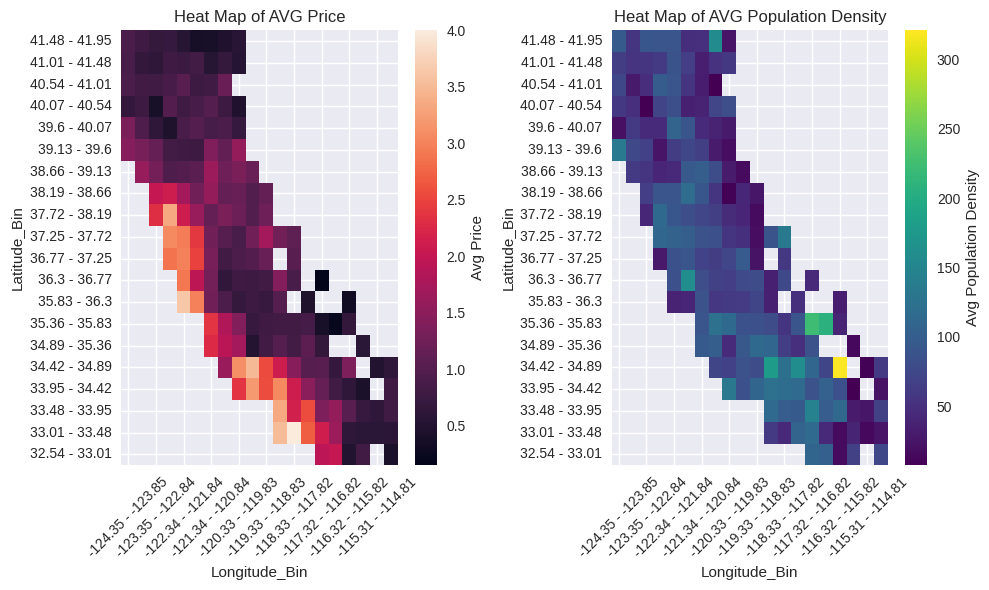

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 6))

sns.heatmap(average_price, ax=ax1).invert_yaxis()
ax1.set_title('Heat Map of AVG Price')
cbar = ax1.figure.axes[-1]
cbar.set_ylabel("Avg Price", rotation=90)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.heatmap(average_popu_dens, ax=ax2, cmap='viridis').invert_yaxis()
ax2.set_title('Heat Map of AVG Population Density')
cbar = ax2.figure.axes[-1]
cbar.set_ylabel("Avg Population Density", rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [10]:
poulation = df['Population'].sum()
print(poulation)

29421840.0


>I found that the bay area and LA seemed to be the most expensive average housing price wise, but the heatmap showing population density did not support generally accepted density of the bay area and LA. This is likely due to this data only reflecting houses for sale and not actual census information of people actually living in an area. The population of CA in 2023 was about 39 million people, while summing up the population in this dataset only gives a result of about 29.5 million people.